In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy
from cdo import *
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
dataset = Dataset("testCDF.nc", "r")

In [3]:
print(dataset.dimensions)

OrderedDict([('bnds', <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
), ('rlon', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlon', size = 424
), ('rlat', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlat', size = 412
), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 60
)])


In [4]:
for i in dataset.variables:
    print(i)

rotated_pole
rlon
lon
rlat
lat
time
time_bnds
pr


In [5]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.4
    contact: Erik van Meijgaard, KNMI, Regional Climate division (vanmeijg@knmi.nl)
    experiment: RCP4.5 run
    experiment_id: rcp45
    realization: 1
    driving_experiment: MOHC-HadGEM2-ES,rcp45,r1i1p1
    driving_model_id: MOHC-HadGEM2-ES
    driving_model_ensemble_member: r1i1p1
    driving_experiment_name: rcp45
    institution: Royal Netherlands Meteorological Institute, De Bilt, The Netherlands
    institute_id: KNMI
    model_id: KNMI-RACMO22E
    rcm_version_id: v2
    references: http://www.knmi.nl/research/regional_climate
    project_id: CORDEX
    CORDEX_domain: EUR-11
    product: output
    frequency: mon
    knmi_global_comment: HadGEM2-ES forced RACMO2 simulation with corrected latitudinal SST-remapping
    knmi_model_comment: RACMO22E: baseline physics from ECMWF CY31r1; modifications include HTESSEL CY33r1, patch K-diffusion CY32r3, moist Turbulen

In [6]:
cdo = Cdo()

In [7]:
cdo.infov(input='testCDF.nc')

['-1 :       Date     Time   Level Gridsize    Miss :     Minimum        Mean     Maximum : Parameter name',
 '1 : 2006-01-16 00:00:00       0   174688       0 :      0.0000  3.1469e-05  0.00042979 : pr',
 '2 : 2006-02-16 00:00:00       0   174688       0 :      0.0000  2.9225e-05  0.00055680 : pr',
 '3 : 2006-03-16 00:00:00       0   174688       0 :      0.0000  2.1257e-05  0.00034298 : pr',
 '4 : 2006-04-16 00:00:00       0   174688       0 :      0.0000  1.5059e-05  0.00023509 : pr',
 '5 : 2006-05-16 00:00:00       0   174688       0 :      0.0000  1.5268e-05  0.00015464 : pr',
 '6 : 2006-06-16 00:00:00       0   174688       0 :      0.0000  1.7751e-05  0.00019486 : pr',
 '7 : 2006-07-16 00:00:00       0   174688       0 :      0.0000  1.3065e-05  0.00018736 : pr',
 '8 : 2006-08-16 00:00:00       0   174688       0 :      0.0000  1.7605e-05  0.00016702 : pr',
 '9 : 2006-09-16 00:00:00       0   174688       0 :      0.0000  2.3436e-05  0.00025481 : pr',
 '10 : 2006-10-16 00:00:00 

In [8]:
dataDIR = 'testCDF.nc'
DS = xr.open_dataset(dataDIR)

## Displaying netCDF file

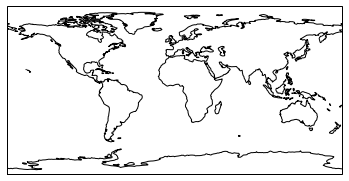

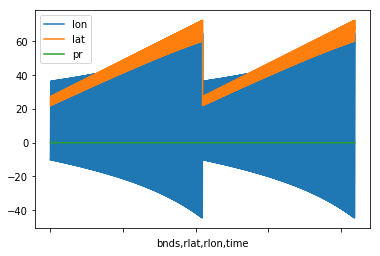

In [34]:
# xarray DS to pandas dataframe
df = DS.to_dataframe()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
df.plot()
plt.show()

In [36]:
df.head()

rotated_pole       lon        lat  \
bnds rlat    rlon    time                                                    
0    -23.375 -28.375 2006-01-16 00:00:00          b'' -10.06388  21.987829   
                     2006-02-16 00:00:00          b'' -10.06388  21.987829   
                     2006-03-16 00:00:00          b'' -10.06388  21.987829   
                     2006-04-16 00:00:00          b'' -10.06388  21.987829   
                     2006-05-16 00:00:00          b'' -10.06388  21.987829   

                                                    time_bnds            pr  
bnds rlat    rlon    time                                                    
0    -23.375 -28.375 2006-01-16 00:00:00  2006-01-01 00:00:00  0.000000e+00  
                     2006-02-16 00:00:00  2006-02-01 00:00:00  0.000000e+00  
                     2006-03-16 00:00:00  2006-03-01 00:00:00  6.389868e-07  
                     2006-04-16 00:00:00  2006-04-01 00:00:00  0.000000e+00  
                     2006-05-16 00:00:00  2006-05-01 00:00:00  0.000000e+00